### 시작하기 전에
- 토큰화 방식 1: 명사, 동사, 형용사이면서 두 글자 이상 형태소만 반영, 불용어 제거
- 토큰화 방식 2: 모든 형태소 반영, 불용어 제거

- 벡터화 방식
    - TF-IDF (SVM, Logistic Regression)
    


# 0. 필요한 모듈 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 31.9 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

In [ ]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import platform
import warnings

warnings.filterwarnings('ignore')

# 1. 데이터 불러오기, 중복 제거

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/ratings_train.txt',
                       sep = '\t',
                       encoding = 'utf-8') # 파일 경로는 각자의 컴퓨터에 맞게 적용
df_train.drop('id', axis=1, inplace=True)
df_train.head(15)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/ratings_train.txt'

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/ratings_test.txt',
                       sep = '\t',
                       encoding = 'utf-8') # 파일 경로는 각자의 컴퓨터에 맞게 적용
df_test.drop('id', axis=1, inplace=True)
df_test.head(15)

,document,label
0,굳 ㅋ,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
5,"음악이 주가 된, 최고의 음악영화",1
6,진정한 쓰레기,0
7,"마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다",0
8,갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한c...,0
9,"이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But, 모든 사람이 그렇지는 않네..",1


In [ ]:
df_train.info()
print()
df_test.info()

# 결측치를 확인해본다.
# 결측치는 document에 5개 존재한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   document  149995 non-null  object
 1   label     150000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   document  49997 non-null  object
 1   label     50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [ ]:
sum(df_train.duplicated())

# train에 중복된 것이 있는지 확인한다.

3659

In [ ]:
sum(df_test.duplicated())

# test에 중복된 것이 있는지 확인한다.

794

In [ ]:
df_train.drop_duplicates(inplace=True)
df_train.dropna(inplace=True)

df_test.drop_duplicates(inplace=True)
df_test.dropna(inplace=True)

# train과 test에 있는 결측치와 중복을 모두 제거한다.

In [ ]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# 이렇게 제거를 하면 index가 연속적이지 않으므로 index를 리셋해준다.

In [ ]:
df_train.info()
print()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146339 entries, 0 to 146338
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   document  146339 non-null  object
 1   label     146339 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49204 entries, 0 to 49203
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   document  49204 non-null  object
 1   label     49204 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 768.9+ KB


In [ ]:
# 지금까지의 과정을 csv로 저장

df_train.to_csv("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/df_train_1.csv", sep='\t')
df_test.to_csv("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/df_test_1.csv", sep='\t')

# 2. 필요 없는 문자 제거

In [ ]:
# 다시 데이터셋 불러오기

df_train_1 = pd.read_csv('/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/df_train_1.csv',
                         sep = '\t',
                         index_col = 0,
                         encoding = 'utf-8')

df_test_1 = pd.read_csv('/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/df_test_1.csv',
                         sep = '\t',
                         index_col = 0,
                         encoding = 'utf-8')

In [ ]:
# 한글, 공백을 제외한 나머지는 모두 제거
# 공백을 남기는 이유는 Komoran은 띄어쓰기도 안 되어있는데
# 오타로 인해 맞춤법까지 틀리는 경우에는 형태소 분석을 전혀 못하기 때문이다.

df_train_1['document'] = df_train_1['document'].apply(lambda x: re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣\s]", "", x))
df_test_1['document'] = df_test_1['document'].apply(lambda x: re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣\s]", "", x))

In [ ]:
# 문자열 길이가 0이 되는 경우를 제거

for idx in range(len(df_train_1)):
    if df_train_1.loc[idx, 'document'] == '' or df_train_1.loc[idx, 'document'].isspace():
        df_train_1.drop(idx, axis=0, inplace=True)

for idx in range(len(df_test_1)):
    if df_test_1.loc[idx, 'document'] == '' or df_test_1.loc[idx, 'document'].isspace():
        df_test_1.drop(idx, axis=0, inplace=True)

# 마찬가지로 index를 0부터 연속적으로 만들기 위해 리셋

df_train_1.reset_index(drop=True, inplace=True)
df_test_1.reset_index(drop=True, inplace=True)

In [ ]:
df_train_1.info()
print()
df_test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145520 entries, 0 to 145519
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   document  145520 non-null  object
 1   label     145520 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48891 entries, 0 to 48890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   document  48891 non-null  object
 1   label     48891 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 764.0+ KB


In [ ]:
df_train_1.head()

,document,label
0,아 더빙 진짜 짜증나네요 목소리,0
1,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [ ]:
df_test_1.head()

,document,label
0,굳 ㅋ,1
1,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
2,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
3,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
4,음악이 주가 된 최고의 음악영화,1


# 3. Tokenization

## 1. WordCloud 이용 불용어 처리

### 1. 명사

In [ ]:
# komoran 라이브러리를 불러온다
# 자소 분리나 오탈자에 대해서 다른 형태소 분석기보다는 강건한 편이다.

from konlpy.tag import Komoran

komoran = Komoran()

In [ ]:
# 명사 중에서 긍정과 부정에 모두 자주 나타나는 명사는 주요 특징으로 보기 어렵다.
# 이를 확인하기 위해 다음 모듈을 import 해준다.

from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# 명사만 뽑아서 긍정 리뷰인 경우에는 긍정 리스트에, 부정 리뷰에는 부정 리스트에 추가

nouns_positive = []
nouns_negative = []

tags_noun = ['NNG', 'NNP', 'NNB', 'NP', 'NR']

for idx in range(len(df_train_1)):
    tokens = komoran.pos(df_train_1.loc[idx, 'document'])
    for token in tokens:
        if token[1] in tags_noun:
            if df_train_1.loc[idx, 'label'] == 1:
                nouns_positive.append(token[0])
            elif df_train_1.loc[idx, 'label'] == 0:
                nouns_negative.append(token[0])
    if idx % 10000 == 0: # 진행 상황 출력을 위한 출력 코드
        print(idx)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000


In [ ]:
# CountVectorizer를 이용해 단어의 출현 빈도를 계산한다.

vectorizer_pos = CountVectorizer()
vectorizer_neg = CountVectorizer()

vec_positive = vectorizer_pos.fit_transform(nouns_positive)
vec_negative = vectorizer_neg.fit_transform(nouns_negative)

In [ ]:
word_pos_list = vectorizer_pos.get_feature_names_out()
count_pos_list = vec_positive.toarray().sum(axis=0)

word_neg_list = vectorizer_neg.get_feature_names_out()
count_neg_list = vec_negative.toarray().sum(axis=0)

In [ ]:
word_pos_count_dict = dict(zip(word_pos_list, count_pos_list))
word_neg_count_dict = dict(zip(word_neg_list, count_neg_list))

In [ ]:
# 글꼴을 설치해주지 않으면 워드클라우드에서 한글이 제대로 나오지 않는다

!apt-get install fonts-nanum*
!apt-get install fontconfig

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 24 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

In [ ]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()
sys_font

['/usr/share/fonts/truetype/nanum/NanumMyeongjo-YetHangul.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquare_acB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/tr

In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

(-0.5, 599.5, 399.5, -0.5)

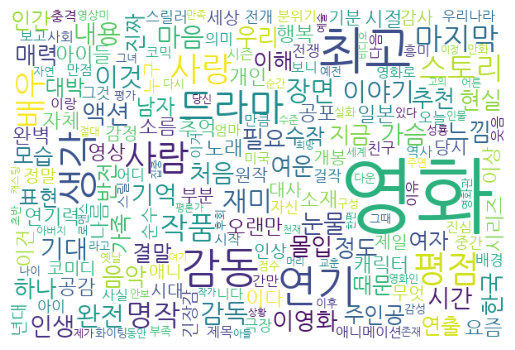

In [ ]:
# 워드 클라우드를 그려준다.

# (긍정)

wordcloud_pos = WordCloud(font_path = font_path,
                          width = 600,
                          height = 400,
                          max_font_size=100,
                          background_color = 'white'
                          ).generate_from_frequencies(word_pos_count_dict)

plt.figure()
plt.imshow(wordcloud_pos)
plt.axis('off')

(-0.5, 599.5, 399.5, -0.5)

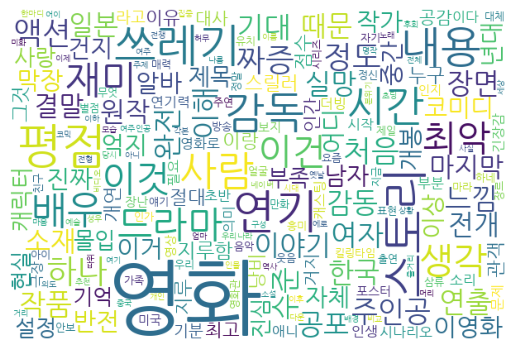

In [ ]:
# (부정)

wordcloud_neg = WordCloud(font_path = font_path,
                          width = 600,
                          height = 400,
                          max_font_size=100,
                          background_color = 'white'
                          ).generate_from_frequencies(word_neg_count_dict)

plt.figure()
plt.imshow(wordcloud_neg)
plt.axis('off')

In [ ]:
word_pos_count_sorted = sorted(word_pos_count_dict.items(), key=lambda x: x[1], reverse=True)
word_pos_count_sorted[:10]

[('영화', 27250),
 ('최고', 5452),
 ('연기', 3783),
 ('감동', 3593),
 ('생각', 3285),
 ('드라마', 2902),
 ('평점', 2610),
 ('사람', 2439),
 ('사랑', 2251),
 ('배우', 2078)]

In [ ]:
word_neg_count_sorted = sorted(word_neg_count_dict.items(), key=lambda x: x[1], reverse=True)
word_neg_count_sorted[:10]

[('영화', 26188),
 ('평점', 3490),
 ('스토리', 3424),
 ('연기', 3246),
 ('쓰레기', 3143),
 ('내용', 2888),
 ('감독', 2775),
 ('시간', 2657),
 ('사람', 2447),
 ('배우', 2273)]

In [ ]:
# 긍정, 부정 리뷰 각각에서 상위 10개 키워드를 추출했을 때
# 긍정, 부정에서 모두 겹치는 것은 긍정/부정 변별에 의미를 주기 어려우므로
# 불용어로 추가한다.

stop_words_noun = ['영화', '연기', '평점', '사람', '배우']

### 2. 동사, 형용사

In [ ]:
verbs_adjs_positive = []
verbs_adjs_negative = []

tags_verb_adj = ['VV', 'VA']

for idx in range(len(df_train_1)):
    tokens = komoran.pos(df_train_1.loc[idx, 'document'])
    for token in tokens:
        if token[1] in tags_verb_adj:
            if df_train_1.loc[idx, 'label'] == 1:
                verbs_adjs_positive.append(token[0])
            elif df_train_1.loc[idx, 'label'] == 0:
                verbs_adjs_negative.append(token[0])
    if idx % 10000 == 0:
        print(idx)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000


In [ ]:
vectorizer_pos = CountVectorizer()
vectorizer_neg = CountVectorizer()

vec_positive = vectorizer_pos.fit_transform(verbs_adjs_positive)
vec_negative = vectorizer_neg.fit_transform(verbs_adjs_negative)

In [ ]:
word_pos_list = vectorizer_pos.get_feature_names_out()
count_pos_list = vec_positive.toarray().sum(axis=0)

word_neg_list = vectorizer_neg.get_feature_names_out()
count_neg_list = vec_negative.toarray().sum(axis=0)

In [ ]:
word_pos_count_dict = dict(zip(word_pos_list, count_pos_list))
word_neg_count_dict = dict(zip(word_neg_list, count_neg_list))

(-0.5, 599.5, 399.5, -0.5)

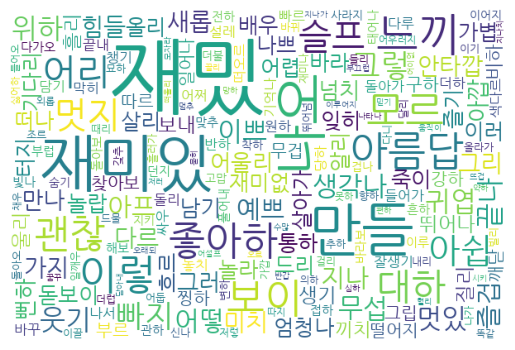

In [ ]:
wordcloud_pos = WordCloud(font_path = font_path,
                          width = 600,
                          height = 400,
                          max_font_size=100,
                          background_color = 'white'
                          ).generate_from_frequencies(word_pos_count_dict)

plt.figure()
plt.imshow(wordcloud_pos)
plt.axis('off')

(-0.5, 599.5, 399.5, -0.5)

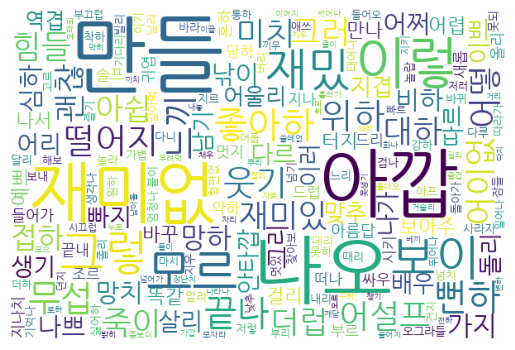

In [ ]:
wordcloud_neg = WordCloud(font_path = font_path,
                          width = 600,
                          height = 400,
                          max_font_size=100,
                          background_color = 'white'
                          ).generate_from_frequencies(word_neg_count_dict)

plt.figure()
plt.imshow(wordcloud_neg)
plt.axis('off')

In [ ]:
word_pos_count_sorted = sorted(word_pos_count_dict.items(), key=lambda x: x[1], reverse=True)
word_pos_count_sorted[:10]

[('재밌', 6603),
 ('재미있', 3224),
 ('만들', 2697),
 ('나오', 2571),
 ('느끼', 1625),
 ('이렇', 1385),
 ('모르', 1358),
 ('보이', 1283),
 ('아름답', 1265),
 ('좋아하', 1169)]

In [ ]:
word_neg_count_sorted = sorted(word_neg_count_dict.items(), key=lambda x: x[1], reverse=True)
word_neg_count_sorted[:10]

[('만들', 4777),
 ('나오', 3856),
 ('아깝', 3846),
 ('재미없', 3024),
 ('이렇', 2070),
 ('모르', 1581),
 ('보이', 1449),
 ('그렇', 1446),
 ('재밌', 1314),
 ('좋아하', 790)]

In [ ]:
# 긍정, 부정 리뷰 각각에서 상위 10개 키워드를 추출했을 때
# 긍정, 부정에서 모두 겹치는 것은 긍정/부정 변별에 의미를 주기 어려우므로
# 불용어로 추가한다.
# 다만, '재밌', '좋아하'는 영화에 대한 감정을 드러낸다고 판단했으므로 존치한다.

stop_words_verb_adj = ['만들', '나오', '이렇', '모르', '보이']

### 3. 나머지

In [ ]:
etc_positive = []
etc_negative = []

tags_exclude = ['NNG', 'NNP', 'NNB', 'NP', 'NR', # 명사
                'VV', 'VA'] # 동사, 형용사

for idx in range(len(df_train_1)):
    tokens = komoran.pos(df_train_1.loc[idx, 'document'])
    for token in tokens:
        if token[1] not in tags_exclude: # 명사, 동사, 형용사를 제외한 나머지 품사 태그이면
            if df_train_1.loc[idx, 'label'] == 1:
                etc_positive.append(token[0])
            elif df_train_1.loc[idx, 'label'] == 0:
                etc_negative.append(token[0])
    if idx % 10000 == 0:
        print(idx)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000


In [ ]:
vectorizer_pos = CountVectorizer()
vectorizer_neg = CountVectorizer()

vec_positive = vectorizer_pos.fit_transform(etc_positive)
vec_negative = vectorizer_neg.fit_transform(etc_negative)

In [ ]:
word_pos_list = vectorizer_pos.get_feature_names_out()
count_pos_list = vec_positive.toarray().sum(axis=0)

word_neg_list = vectorizer_neg.get_feature_names_out()
count_neg_list = vec_negative.toarray().sum(axis=0)

In [ ]:
word_pos_count_dict = dict(zip(word_pos_list, count_pos_list))
word_neg_count_dict = dict(zip(word_neg_list, count_neg_list))

(-0.5, 599.5, 399.5, -0.5)

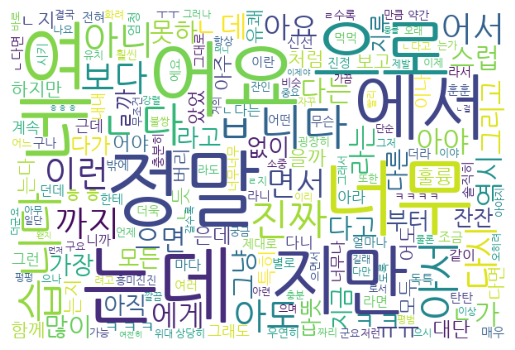

In [ ]:
wordcloud_pos = WordCloud(font_path = font_path,
                          width = 600,
                          height = 400,
                          max_font_size=100,
                          background_color = 'white'
                          ).generate_from_frequencies(word_pos_count_dict)

plt.figure()
plt.imshow(wordcloud_pos)
plt.axis('off')

(-0.5, 599.5, 399.5, -0.5)

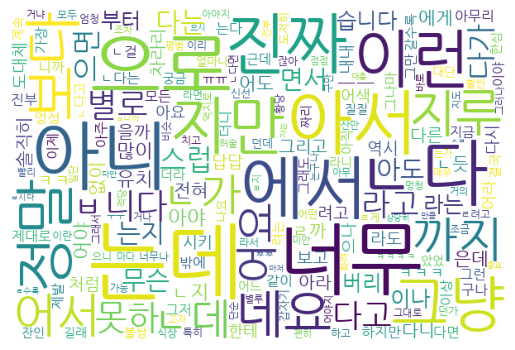

In [ ]:
wordcloud_neg = WordCloud(font_path = font_path,
                          width = 600,
                          height = 400,
                          max_font_size=100,
                          background_color = 'white'
                          ).generate_from_frequencies(word_neg_count_dict)

plt.figure()
plt.imshow(wordcloud_neg)
plt.axis('off')

In [ ]:
word_pos_count_sorted = sorted(word_pos_count_dict.items(), key=lambda x: x[1], reverse=True)
word_pos_count_sorted[:10]

[('정말', 5837),
 ('너무', 5623),
 ('어요', 5594),
 ('는데', 5556),
 ('네요', 4941),
 ('지만', 4535),
 ('으로', 4414),
 ('에서', 4249),
 ('ㅂ니다', 4154),
 ('습니다', 3887)]

In [ ]:
word_neg_count_sorted = sorted(word_neg_count_dict.items(), key=lambda x: x[1], reverse=True)
word_neg_count_sorted[:10]

[('는데', 5667),
 ('너무', 4972),
 ('으로', 4675),
 ('아니', 4462),
 ('ㄴ다', 4234),
 ('아서', 4006),
 ('에서', 3737),
 ('진짜', 3422),
 ('이런', 3047),
 ('지만', 2977)]

In [ ]:
# 긍정, 부정 리뷰 각각에서 상위 10개 키워드를 추출했을 때
# 긍정, 부정에서 모두 겹치는 것은 긍정/부정 변별에 의미를 주기 어려우므로
# 불용어로 추가한다.

stop_words_etc = ['너무', '는데', '지만', '으로', '에서']

## 2. Tokenization 실행

### 토큰화 1

In [ ]:
# 앞선 불용어 목록을 하나로 합친다

stop_words = stop_words_noun + stop_words_verb_adj + stop_words_etc

In [ ]:
train_tokens_1 = []
train_target_1 = []

test_tokens_1 = []
test_target_1 = []

tags_include = ['NNG', 'NNP', 'NNB', 'NP', 'NR', # 명사
                'VV', 'VA'] # 동사, 형용사

# 토큰화 1

for idx in range(len(df_train_1)):
    tmp = []
    tokens = komoran.pos(df_train_1.loc[idx, 'document'])
    for token in tokens:
        if token[1] in tags_include and len(token[0]) > 1 and token[0] not in stop_words:
        # 명사, 동사, 형용사만 고려, 2글자 이상만 고려, 불용어 제거
            tmp.append(token[0])
    if len(tmp) > 0:
        train_tokens_1.append(tmp)
        train_target_1.append(df_train_1.loc[idx, 'label'])
    if idx % 10000 == 0: # 진행 상황 확인
        print(idx)

for idx in range(len(df_test_1)):
    tmp = []
    tokens = komoran.pos(df_test_1.loc[idx, 'document'])
    for token in tokens:
        if token[1] in tags_include and len(token[0]) > 1 and token[0] not in stop_words:
            tmp.append(token[0])
    if len(tmp) > 0:
        test_tokens_1.append(tmp)
        test_target_1.append(df_test_1.loc[idx, 'label'])
    if idx % 10000 == 0: # 진행 상황 확인
        print(idx)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
0
10000
20000
30000
40000


In [ ]:
train_tokens_1[0], train_target_1[0]

(['더빙', '짜증', '목소리'], 0)

In [ ]:
test_tokens_1[0], test_target_1[0]

(['나쁘'], 0)

In [ ]:
len(train_tokens_1), len(train_target_1)

(134717, 134717)

In [ ]:
len(test_tokens_1), len(test_target_1)

(45244, 45244)

### 토큰화 2

In [ ]:
train_tokens_2 = []
train_target_2 = []

test_tokens_2 = []
test_target_2 = []

# 토큰화 2

for idx in range(len(df_train_1)):
    tmp = []
    tokens = komoran.pos(df_train_1.loc[idx, 'document'])
    for token in tokens:
        if token[0] not in stop_words:
        # 모든 형태소 고려, 불용어 제거
            tmp.append(token[0])
    if len(tmp) > 0:
        train_tokens_2.append(tmp)
        train_target_2.append(df_train_1.loc[idx, 'label'])
    if idx % 10000 == 0: # 진행 상황 확인
        print(idx)

for idx in range(len(df_test_1)):
    tmp = []
    tokens = komoran.pos(df_test_1.loc[idx, 'document'])
    for token in tokens:
        if token[0] not in stop_words:
            tmp.append(token[0])
    if len(tmp) > 0:
        test_tokens_2.append(tmp)
        test_target_2.append(df_test_1.loc[idx, 'label'])
    if idx % 10000 == 0: # 진행 상황 확인
        print(idx)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
0
10000
20000
30000
40000


In [ ]:
train_tokens_2[0], train_target_2[0]

(['아', '더빙', '진짜', '짜증', '나', '네요', '목소리'], 0)

In [ ]:
test_tokens_2[0], test_target_2[0]

(['굳', 'ㅋ'], 1)

In [ ]:
len(train_tokens_2), len(train_target_2)

(145510, 145510)

In [ ]:
len(test_tokens_2), len(test_target_2)

(48888, 48888)

In [ ]:
# 지금까지의 진행 상황 저장

def write_data(file_name, in_list):

    with open(file_name, 'w+') as file:
        for num, li in enumerate(in_list):
            if num+1 < len(in_list):
                file.write(', '.join(li) + "\n")
            else:
                file.write(', '.join(li))

In [ ]:
write_data("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/train_tokens_1.txt", train_tokens_1)
np.savetxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/train_target_1.txt", train_target_1, fmt='%d')
write_data("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/test_tokens_1.txt", test_tokens_1)
np.savetxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/test_target_1.txt", test_target_1, fmt='%d')

write_data("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/train_tokens_2.txt", train_tokens_2)
np.savetxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/train_target_2.txt", train_target_2, fmt='%d')
write_data("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/test_tokens_2.txt", test_tokens_2)
np.savetxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/test_target_2.txt", test_target_2, fmt='%d')

# 4-1. Vectorization

## 0. 작업 데이터 불러오기

In [ ]:
train_tokens_1st = []
test_tokens_1st = []

train_tokens_2nd = []
test_tokens_2nd = []

def read_data(file_name, out_list):

    with open(file_name, "r") as file:
        for fi in file:
            li = [ name.strip() for name in fi.split(",")]
            out_list.append(li)

In [ ]:
read_data("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/train_tokens_1.txt", train_tokens_1st)
read_data("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/test_tokens_1.txt", test_tokens_1st)

read_data("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/train_tokens_2.txt", train_tokens_2nd)
read_data("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/test_tokens_2.txt", test_tokens_2nd)

In [ ]:
train_target_1st = np.loadtxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/train_target_1.txt", dtype='int64')
test_target_1st = np.loadtxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/test_target_1.txt", dtype='int64')

train_target_2nd = np.loadtxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/train_target_2.txt", dtype='int64')
test_target_2nd = np.loadtxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/test_target_2.txt", dtype='int64')

In [ ]:
len(train_tokens_1st), len(train_target_1st)

(134717, 134717)

In [ ]:
len(test_tokens_1st), len(test_target_1st)

(45244, 45244)

In [ ]:
len(train_tokens_2nd), len(train_target_2nd)

(145510, 145510)

In [ ]:
len(test_tokens_2nd), len(test_target_2nd)

(48888, 48888)

## 1. TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer_tfidf_1st = TfidfVectorizer(min_df=5, analyzer=lambda x: x)
vectorizer_tfidf_2nd = TfidfVectorizer(min_df=5, analyzer=lambda x: x)

In [ ]:
train_vectors_tfidf_1st = vectorizer_tfidf_1st.fit_transform(train_tokens_1st)
test_vectors_tfidf_1st = vectorizer_tfidf_1st.transform(test_tokens_1st)

train_vectors_tfidf_2nd = vectorizer_tfidf_2nd.fit_transform(train_tokens_2nd)
test_vectors_tfidf_2nd = vectorizer_tfidf_2nd.transform(test_tokens_2nd)

In [ ]:
vectorizer_tfidf_1st.vocabulary_

{'더빙': 1948,
 '짜증': 8386,
 '목소리': 3072,
 '포스터': 9436,
 '초딩': 8598,
 '오버': 6202,
 '가볍': 41,
 '교도소': 734,
 '이야기': 6973,
 '재미': 7503,
 '조정': 7940,
 '익살': 7088,
 '돋보이': 2086,
 '스파이더맨': 5048,
 '초등학교': 8596,
 '학년': 9681,
 '아깝': 5370,
 '원작': 6533,
 '긴장감': 1093,
 '살리': 4363,
 '반개': 3470,
 '이응경': 7004,
 '생활': 4494,
 '인지': 7151,
 '정말': 7735,
 '발로': 3523,
 '그것': 888,
 '납치': 1425,
 '감금': 153,
 '반복': 3482,
 '드라마': 2235,
 '가족': 86,
 '못하': 3103,
 '모이': 3053,
 '액션': 5664,
 '헐리우드': 9918,
 '길들이': 1097,
 '눈물': 1617,
 '나서': 1324,
 '년대': 1514,
 '향수': 9883,
 '자극': 7284,
 '허진호': 9908,
 '감성': 168,
 '절제': 7696,
 '멜로': 2961,
 '달인': 1805,
 '이다': 6840,
 '손들': 4820,
 '건너': 331,
 '뛰쳐나오': 2370,
 '이범수': 6900,
 '드럽': 2244,
 '신문': 5218,
 '기사': 1045,
 '로만': 2507,
 '잊어버리': 7275,
 '취향': 8740,
 '존중': 7972,
 '극장': 950,
 '감동': 161,
 '스토리': 5025,
 '어거지': 5731,
 '긴장': 1092,
 '웃기': 6501,
 '바스코': 3385,
 '이기': 6823,
 '락스': 2425,
 '바비': 3381,
 '아이돌': 5462,
 '안달': 5543,
 '표절': 9486,
 '이해': 7076,
 '재미없': 7505,
 '이건': 6809,
 '깨알': 12

In [ ]:
vectorizer_tfidf_2nd.vocabulary_

{'아': 6824,
 '더빙': 2668,
 '진짜': 10422,
 '짜증': 10494,
 '나': 1788,
 '네요': 2064,
 '목소리': 4098,
 '흠': 12767,
 '포스터': 11805,
 '보고': 4931,
 '초딩': 10792,
 '줄': 10161,
 '오버': 7887,
 '조차': 9981,
 '가볍': 218,
 '지': 10244,
 '않': 7082,
 '구나': 1086,
 '교도소': 1057,
 '이야기': 8844,
 '이': 8654,
 '구먼': 1101,
 '솔직히': 6171,
 '재미': 9428,
 '는': 2231,
 '없': 7438,
 '다': 2298,
 '조정': 9970,
 '익살': 8966,
 '스럽': 6342,
 'ㄴ': 4,
 '가': 171,
 '돋보이': 2837,
 '었': 7446,
 '던': 2680,
 '스파이더맨': 6425,
 '늙': 2255,
 '어': 7266,
 '기': 1406,
 '만': 3714,
 '하': 12002,
 '았': 7131,
 '너무나': 2028,
 '도': 2731,
 '막': 3695,
 '떼': 3168,
 '세': 5986,
 '부터': 5124,
 '초등학교': 10790,
 '학년': 12091,
 '생': 5745,
 '아깝': 6832,
 'ㅁ': 81,
 '원작': 8287,
 '의': 8610,
 '긴장감': 1509,
 '을': 8567,
 '제대로': 9842,
 '살리': 5625,
 '내': 1961,
 '못하': 4139,
 '별': 4902,
 '반개': 4579,
 '욕': 8116,
 'ㄴ다': 9,
 '이응경': 8877,
 '생활': 5778,
 '몇': 4018,
 '년': 2071,
 '인지': 9032,
 '정말': 9741,
 '발로': 4639,
 '아도': 6854,
 '그것': 1242,
 '보다': 4947,
 '납치': 1946,
 '감금': 349,
 '반복': 4593,
 '드라마

In [ ]:
train_vectors_tfidf_1st

<134717x10282 sparse matrix of type '<class 'numpy.float64'>'
	with 587874 stored elements in Compressed Sparse Row format>

In [ ]:
test_vectors_tfidf_1st

<45244x10282 sparse matrix of type '<class 'numpy.float64'>'
	with 195230 stored elements in Compressed Sparse Row format>

In [ ]:
train_vectors_tfidf_2nd

<145510x12834 sparse matrix of type '<class 'numpy.float64'>'
	with 2074853 stored elements in Compressed Sparse Row format>

In [ ]:
test_vectors_tfidf_2nd

<48888x12834 sparse matrix of type '<class 'numpy.float64'>'
	with 694204 stored elements in Compressed Sparse Row format>

In [ ]:
# 지금까지 진행 상황 저장

# sparse 행렬 그대로 저장해야 한다.
# array로 바꾸어서 저장하면 메모리가 초과한다.

from scipy.sparse import *

save_npz('/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/train_tfidf_1st.npz', train_vectors_tfidf_1st)
save_npz('/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/train_tfidf_2nd.npz', train_vectors_tfidf_2nd)

save_npz('/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/test_tfidf_1st.npz', test_vectors_tfidf_1st)
save_npz('/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/test_tfidf_2nd.npz', test_vectors_tfidf_2nd)

# 4-2: Padding

## 0. 작업 데이터 불러오기

In [ ]:
train_tokens_1st = []
test_tokens_1st = []

train_tokens_2nd = []
test_tokens_2nd = []

def read_data(file_name, out_list):

    with open(file_name, "r") as file:
        for fi in file:
            li = [ name.strip() for name in fi.split(",")]
            out_list.append(li)

In [ ]:
read_data("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/train_tokens_1.txt", train_tokens_1st)
read_data("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/test_tokens_1.txt", test_tokens_1st)

read_data("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/train_tokens_2.txt", train_tokens_2nd)
read_data("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/test_tokens_2.txt", test_tokens_2nd)

In [ ]:
train_target_1st = np.loadtxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/train_target_1.txt", dtype='int64')
test_target_1st = np.loadtxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/test_target_1.txt", dtype='int64')

train_target_2nd = np.loadtxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/train_target_2.txt", dtype='int64')
test_target_2nd = np.loadtxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/test_target_2.txt", dtype='int64')

In [ ]:
len(train_tokens_1st), len(train_target_1st)

(134717, 134717)

In [ ]:
len(test_tokens_1st), len(test_target_1st)

(45244, 45244)

In [ ]:
len(train_tokens_2nd), len(train_target_2nd)

(145510, 145510)

In [ ]:
len(test_tokens_2nd), len(test_target_2nd)

(48888, 48888)

## 1. 패딩 작업 진행

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_len_1st = max([len(token) for token in train_tokens_1st])
max_len_2nd = max([len(token) for token in train_tokens_2nd])

# 최댓값의 길이로 패딩 진행 예정

In [ ]:
max_len_1st, max_len_2nd

(65, 104)

In [ ]:
tokenizer_1st = Tokenizer(oov_token='<unk>') # unk: unknown
tokenizer_2nd = Tokenizer(oov_token='<unk>')

# out-of-vocabulary(vocabulary에 없는 단어)는 따로 처리해 줄 필요가 있다.
# oov_token을 지정하지 않으면 그 토큰은 생략하고 진행이 되게 된다..
# oov_token을 지정해주면 다른 단어들의 포지션 정보를 유지시키는 효과가 있다.

### 1. 토큰화 1에 적용

In [ ]:
tokenizer_1st.fit_on_texts(train_tokens_1st)
train_1st_sequences = tokenizer_1st.texts_to_sequences(train_tokens_1st)

train_1st_padded = pad_sequences(train_1st_sequences,
                                 maxlen=max_len_1st)

# pre-padding을 하는 이유는 뒤로 갈수록 앞에 있는 정보가 희미해지기 때문에
# 그런 현상을 최소화하고자 하는 것이다.

In [ ]:
tokenizer_1st.word_index

{'<unk>': 1,
 '재밌': 2,
 '최고': 3,
 '스토리': 4,
 '생각': 5,
 '드라마': 6,
 '감동': 7,
 '내용': 8,
 '아깝': 9,
 '감독': 10,
 '재미있': 11,
 '시간': 12,
 '재미': 13,
 '쓰레기': 14,
 '재미없': 15,
 '이것': 16,
 '작품': 17,
 '사랑': 18,
 '마지막': 19,
 '액션': 20,
 '이건': 21,
 '기대': 22,
 '장면': 23,
 '하나': 24,
 '완전': 25,
 '느끼': 26,
 '처음': 27,
 '정도': 28,
 '그렇': 29,
 '느낌': 30,
 '이야기': 31,
 '최악': 32,
 '좋아하': 33,
 '명작': 34,
 '이해': 35,
 '한국': 36,
 '주인공': 37,
 '여자': 38,
 '연출': 39,
 '이영화': 40,
 '괜찮': 41,
 '때문': 42,
 '대하': 43,
 '기억': 44,
 '결말': 45,
 '소재': 46,
 '마음': 47,
 '현실': 48,
 '인생': 49,
 '아름답': 50,
 '짜증': 51,
 '몰입': 52,
 '아쉽': 53,
 '공포': 54,
 '전개': 55,
 '수준': 56,
 '반전': 57,
 '어리': 58,
 '진짜': 59,
 '일본': 60,
 '필요': 61,
 '매력': 62,
 '음악': 63,
 '원작': 64,
 '가슴': 65,
 '끝나': 66,
 '눈물': 67,
 '무섭': 68,
 '남자': 69,
 '웃기': 70,
 '우리': 71,
 '위하': 72,
 '멋지': 73,
 '슬프': 74,
 '이상': 75,
 '추천': 76,
 '어떻': 77,
 '인간': 78,
 '지금': 79,
 '자체': 80,
 '가지': 81,
 '실망': 82,
 '캐릭터': 83,
 '뻔하': 84,
 '개봉': 85,
 '년대': 86,
 '여운': 87,
 '빠지': 88,
 '코미디': 89,
 '이다': 90,
 '연

In [ ]:
train_1st_padded

array([[   0,    0,    0, ...,  190,   51,  302],
       [   0,    0,    0, ...,  271,  763,  304],
       [   0,    0,    0, ...,   31,   13, 2343],
       ...,
       [   0,    0,    0, ..., 7580, 7523,  500],
       [   0,    0,    0, ..., 1754,  532, 5485],
       [   0,    0,    0, ...,  942,    8,  691]], dtype=int32)

In [ ]:
train_1st_padded.shape

(134717, 65)

In [ ]:
test_1st_sequences = tokenizer_1st.texts_to_sequences(test_tokens_1st)

test_1st_padded = pad_sequences(test_1st_sequences,
                                maxlen=max_len_1st)

# test를 padding할 때는 train에서 fit했던 그대로 해야 하며,
# test에서 다시 fit하면 안 된다.

In [ ]:
test_1st_padded

array([[    0,     0,     0, ...,     0,     0,   182],
       [    0,     0,     0, ...,     0,    25,   129],
       [    0,     0,     0, ...,  1148, 18683,   359],
       ...,
       [    0,     0,     0, ...,   451,   642,  1454],
       [    0,     0,     0, ...,  4322,  5919,  6609],
       [    0,     0,     0, ...,     0,   435,   248]], dtype=int32)

In [ ]:
test_1st_padded.shape

(45244, 65)

### 2. 토큰화 2에 적용

In [ ]:
tokenizer_2nd.fit_on_texts(train_tokens_2nd)
train_2nd_sequences = tokenizer_2nd.texts_to_sequences(train_tokens_2nd)

train_2nd_padded = pad_sequences(train_2nd_sequences,
                                 maxlen=max_len_2nd)

# pre-padding을 하는 이유는 뒤로 갈수록 앞에 있는 정보가 희미해지기 때문에
# 그런 현상을 최소화하고자 하는 것이다.

In [ ]:
tokenizer_2nd.word_index

{'<unk>': 1,
 '이': 2,
 '하': 3,
 'ㄴ': 4,
 '는': 5,
 '다': 6,
 '보': 7,
 '고': 8,
 '에': 9,
 '가': 10,
 '의': 11,
 '도': 12,
 '은': 13,
 '을': 14,
 '았': 15,
 '게': 16,
 'ㄹ': 17,
 '었': 18,
 '어': 19,
 '들': 20,
 '지': 21,
 '아': 22,
 '를': 23,
 '있': 24,
 'ㅁ': 25,
 '없': 26,
 '나': 27,
 '되': 28,
 '만': 29,
 '좋': 30,
 '주': 31,
 '것': 32,
 '기': 33,
 '적': 34,
 '정말': 35,
 '점': 36,
 '음': 37,
 '내': 38,
 '같': 39,
 '네': 40,
 '안': 41,
 'ㄴ다': 42,
 '로': 43,
 '재밌': 44,
 '진짜': 45,
 '않': 46,
 '아니': 47,
 '어요': 48,
 '아서': 49,
 '네요': 50,
 '말': 51,
 '수': 52,
 '과': 53,
 '거': 54,
 '면': 55,
 '잘': 56,
 'ㅂ니다': 57,
 '최고': 58,
 '던': 59,
 '왜': 60,
 '그': 61,
 '뭐': 62,
 '겠': 63,
 '스토리': 64,
 '생각': 65,
 '이런': 66,
 '때': 67,
 '습니다': 68,
 '시': 69,
 '드라마': 70,
 '보다': 71,
 '더': 72,
 '한': 73,
 '와': 74,
 '감동': 75,
 '싶': 76,
 '까지': 77,
 '알': 78,
 '라': 79,
 '어서': 80,
 '아깝': 81,
 '내용': 82,
 '요': 83,
 '오': 84,
 '좀': 85,
 '감독': 86,
 '그냥': 87,
 '듯': 88,
 '재': 89,
 '재미있': 90,
 '시간': 91,
 '중': 92,
 '재미': 93,
 '지루': 94,
 '아도': 95,
 '쓰레기': 96,
 '재미없': 97

In [ ]:
train_2nd_padded

array([[    0,     0,     0, ...,    27,    50,   720],
       [    0,     0,     0, ...,    21,    46,   385],
       [    0,     0,     0, ...,     0,     0, 23295],
       ...,
       [    0,     0,     0, ...,    13,  1072,     6],
       [    0,     0,     0, ...,    20,    11,  7287],
       [    0,     0,     0, ...,     2,  1363,     4]], dtype=int32)

In [ ]:
train_2nd_padded.shape

(145510, 104)

In [ ]:
test_2nd_sequences = tokenizer_2nd.texts_to_sequences(test_tokens_2nd)

test_2nd_padded = pad_sequences(test_2nd_sequences,
                                maxlen=max_len_2nd)

# test를 padding할 때는 train에서 fit했던 그대로 해야 하며,
# test에서 다시 fit하면 안 된다.

In [ ]:
test_2nd_padded

array([[   0,    0,    0, ...,    0,  896,  296],
       [   0,    0,    0, ..., 3229,   47,  792],
       [   0,    0,    0, ...,   33,    9,    5],
       ...,
       [   0,    0,    0, ...,    3,   16,   42],
       [   0,    0,    0, ...,    6, 8551,   40],
       [   0,    0,    0, ...,   60,  572,   19]], dtype=int32)

In [ ]:
test_2nd_padded.shape

(48888, 104)

In [ ]:
# 지금까지의 진행 상황 저장

np.savetxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/train_1st_padded.txt", train_1st_padded, fmt='%d')
np.savetxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/test_1st_padded.txt", test_1st_padded, fmt='%d')

np.savetxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/train_2nd_padded.txt", train_2nd_padded, fmt='%d')
np.savetxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/test_2nd_padded.txt", test_2nd_padded, fmt='%d')

# 전처리 저장 파일을 여는 코드
- 분석(모델링)할 때 불러오면 되는 코드
- 각자의 컴퓨터에 맞게 불러오는 주소는 수정 필요
- 불러올 때 변수명은 마음대로 설정
- 이하 모든 파일에서 1st는 1번째 토큰화 적용, 2nd는 2번째 토큰화 적용입니다.
     - 1st: 명사, 동사, 형용사만 포함, 2글자 이상만 포함, (워드 클라우드를 통한) 불용어는 제거
     - 2nd: 품사, 글자 수 무관 모든 형태소 포함, (워드 클라우드를 통한) 불용어는 제거

In [ ]:
from scipy.sparse import *

train_tfidf_1st = load_npz('/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/train_tfidf_1st.npz')
train_tfidf_2nd = load_npz('/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/train_tfidf_2nd.npz')

test_tfidf_1st = load_npz('/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/test_tfidf_1st.npz')
test_tfidf_2nd = load_npz('/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/test_tfidf_2nd.npz')

In [ ]:
train_1st_padded = np.loadtxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/train_1st_padded.txt", dtype='int64')
test_1st_padded = np.loadtxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/test_1st_padded.txt", dtype='int64')

train_2nd_padded = np.loadtxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/train_2nd_padded.txt", dtype='int64')
test_2nd_padded = np.loadtxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/test_2nd_padded.txt", dtype='int64')

In [ ]:
train_target_1st = np.loadtxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/train_target_1.txt", dtype='int64')
test_target_1st = np.loadtxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/test_target_1.txt", dtype='int64')

train_target_2nd = np.loadtxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/train_target_2.txt", dtype='int64')
test_target_2nd = np.loadtxt("/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/test_target_2.txt", dtype='int64')

In [ ]:
# npz 파일은 불러오면 이런 식으로 출력되는 게 정상입니다.
# 희소 행렬을 저장하기 위한 파일이라고 생각하면 됩니다.
# npz로 저장한 이유는 희소 행렬을 밀집 행렬로 바꿔서 저장하게 되면 저장, 모델링이 메모리 초과로 인해 모두 지장이 생깁니다.

train_tfidf_1st

<134717x10282 sparse matrix of type '<class 'numpy.float64'>'
	with 587874 stored elements in Compressed Sparse Row format>

In [ ]:
# 나머지 txt 파일은 array로 나오면 됩니다
train_1st_padded

array([[   0,    0,    0, ...,  190,   51,  302],
       [   0,    0,    0, ...,  271,  763,  304],
       [   0,    0,    0, ...,   31,   13, 2343],
       ...,
       [   0,    0,    0, ..., 7580, 7523,  500],
       [   0,    0,    0, ..., 1754,  532, 5485],
       [   0,    0,    0, ...,  942,    8,  691]])

In [ ]:
train_target_1st

array([0, 1, 0, ..., 0, 1, 0])

## 1. Baseline 모델

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

from scipy.sparse import *

In [ ]:
# baseline models

scaler_tfidf_1st = StandardScaler(with_mean=False) # sparse 행렬은 with_mean=False로 설정해야 한다.
scaler_tfidf_2nd = StandardScaler(with_mean=False)

svc_tfidf_1st = LinearSVC(random_state=42) # 토큰화 1 기반, TF-IDF
svc_tfidf_2nd = LinearSVC(random_state=42) # 토큰화 2 기반, TF-IDF

In [ ]:
# train vector 스케일링

train_tfidf_1st_new = scaler_tfidf_1st.fit_transform(train_tfidf_1st)
train_tfidf_2nd_new = scaler_tfidf_2nd.fit_transform(train_tfidf_2nd)

In [ ]:
# test vector 스케일링

test_tfidf_1st_new = scaler_tfidf_1st.transform(test_tfidf_1st)
test_tfidf_2nd_new = scaler_tfidf_2nd.transform(test_tfidf_2nd)

In [ ]:
# svc fit

svc_tfidf_1st.fit(train_tfidf_1st_new, train_target_1st)
svc_tfidf_2nd.fit(train_tfidf_2nd_new, train_target_2nd)

LinearSVC(random_state=42)

In [ ]:
# svc predict

target_tfidf_1st_predict = svc_tfidf_1st.predict(test_tfidf_1st_new)
target_tfidf_2nd_predict = svc_tfidf_2nd.predict(test_tfidf_2nd_new)

In [ ]:
accuracy_score(test_target_1st, target_tfidf_1st_predict), roc_auc_score(test_target_1st, target_tfidf_1st_predict)

In [ ]:
accuracy_score(test_target_2nd, target_tfidf_2nd_predict), roc_auc_score(test_target_2nd, target_tfidf_2nd_predict)

## 2. Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
scaler = StandardScaler(with_mean=False)
svc = LinearSVC(random_state=42)

param_grid = {
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
    'loss': ['hinge', 'squared_hinge']
    # squared_hinge는 hinge 부분을 기점으로 loss가 제곱으로 올라가기 때문에
    # 오분류 점수가 정답 분류 점수보다 많이 클 때 loss가 급격히 증가한다.
}

grid_search = GridSearchCV(svc,
                           param_grid,
                           cv=3,
                           scoring='roc_auc',
                           verbose=3)

In [ ]:
# 일단 2번째 토큰화 방식에 대해서만 점검

train = scaler.fit_transform(train_tfidf_2nd)
test = scaler.transform(test_tfidf_2nd)

In [ ]:
grid_search.fit(train, train_target_2nd)

In [ ]:
grid_search.best_params_, grid_search.best_score_

In [ ]:
grid_search.cv_results_

In [ ]:
target_predict = grid_search.predict(test)

In [ ]:
accuracy_score(test_target_2nd, target_predict), roc_auc_score(test_target_2nd, target_predict)

## 3. LSTM

In [ ]:
max([max(tokens) for tokens in train_1st_padded]), max([max(tokens) for tokens in train_2nd_padded])

(28372, 54417)

In [ ]:
import tensorflow as tf

model_1st = tf.keras.Sequential()
model_1st.add(tf.keras.layers.Embedding(28373, 16, input_shape=(None,))) # 단어를 밀집 벡터로 변환
model_1st.add(tf.keras.layers.LSTM(8, dropout = 0.2, recurrent_dropout=0.2)) ## dropout 추가
model_1st.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_1st.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
model_1st.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          453968    
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 454777 (1.73 MB)
Trainable params: 454777 (1.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model_1st.fit(train_1st_padded,
                        train_target_1st,
                        epochs=5,
                        batch_size= 256,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/5
421/421 [==============================] - 50s 106ms/step - loss: 0.5369 - accuracy: 0.7462 - val_loss: 0.4498 - val_accuracy: 0.7911
Epoch 2/5
421/421 [==============================] - 42s 101ms/step - loss: 0.4242 - accuracy: 0.8048 - val_loss: 0.4439 - val_accuracy: 0.7902
Epoch 3/5
421/421 [==============================] - 48s 114ms/step - loss: 0.3952 - accuracy: 0.8228 - val_loss: 0.4501 - val_accuracy: 0.7867
Epoch 4/5
421/421 [==============================] - 44s 103ms/step - loss: 0.3771 - accuracy: 0.8323 - val_loss: 0.4580 - val_accuracy: 0.7867
Epoch 5/5
421/421 [==============================] - 46s 108ms/step - loss: 0.3638 - accuracy: 0.8389 - val_loss: 0.4677 - val_accuracy: 0.7853


In [ ]:
predict = model_1st.evaluate(test_1st_padded,
                             test_target_1st,
                             verbose=1)
print(predict)

1414/1414 [==============================] - 15s 10ms/step - loss: 0.4692 - accuracy: 0.7839
[0.46917465329170227, 0.7838829755783081]


In [ ]:
model_2nd = tf.keras.Sequential()
model_2nd.add(tf.keras.layers.Embedding(54418, 16, input_shape=(None,)))
model_2nd.add(tf.keras.layers.LSTM(8, dropout = 0.2))
model_2nd.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_2nd.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
model_2nd.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          870688    
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 871497 (3.32 MB)
Trainable params: 871497 (3.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model_2nd.fit(train_2nd_padded,
                        train_target_2nd,
                        epochs=5,
                        batch_size=64,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/5
1819/1819 [==============================] - 112s 62ms/step - loss: 0.1707 - accuracy: 0.9331 - val_loss: 0.4914 - val_accuracy: 0.8196
Epoch 2/5
1819/1819 [==============================] - 123s 67ms/step - loss: 0.1624 - accuracy: 0.9369 - val_loss: 0.4990 - val_accuracy: 0.8183
Epoch 3/5
1819/1819 [==============================] - 127s 70ms/step - loss: 0.1557 - accuracy: 0.9397 - val_loss: 0.5461 - val_accuracy: 0.8165
Epoch 4/5
1819/1819 [==============================] - 132s 73ms/step - loss: 0.1512 - accuracy: 0.9421 - val_loss: 0.5221 - val_accuracy: 0.8157
Epoch 5/5
1819/1819 [==============================] - 123s 68ms/step - loss: 0.1459 - accuracy: 0.9430 - val_loss: 0.5429 - val_accuracy: 0.8167


In [ ]:
predict = model_2nd.evaluate(test_2nd_padded,
                             test_target_2nd,
                             verbose=1)
print(predict)

1528/1528 [==============================] - 17s 11ms/step - loss: 0.5443 - accuracy: 0.8160
[0.5443075895309448, 0.8160489201545715]


In [ ]:
import os

save_dir = os.getcwd()
model_name = 'keras_naver_review_trained_model'

# Save model and weights
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

NameError: name 'model' is not defined

# 5. 모델링

# **LSTM**

## 준비하기
- Embedding output_dim = 100
- LSTM units = 128
    - 너무 작으면 정보를 담기에 충분하지 않을 수 있다고 판단해서 이렇게 설정함
- dropout = 0.2
- recurrent_dropout = 0.2

In [ ]:
max([max(tokens) for tokens in train_1st_padded]), max([max(tokens) for tokens in train_2nd_padded])

In [ ]:
import tensorflow as tf

model_1st = tf.keras.Sequential()
model_1st.add(tf.keras.layers.Embedding(28373, 100, input_shape=(None,)))
model_1st.add(tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_1st.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# 각각의 batch_size에 대해 val_loss가 최소인 모델만 저장
# 즉, 매 epoch 반복마다 val_loss에 대해 새로운 최솟값이 나오면 저장, 실패하면 저장하지 않음.

checkpoint_1st_32 = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_1st_32.h5',
                                                       monitor='val_loss',
                                                       verbose=1,
                                                       save_best_only=True)

checkpoint_1st_64 = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_1st_64.h5',
                                                       monitor='val_loss',
                                                       verbose=1,
                                                       save_best_only=True)

checkpoint_1st_128 = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_1st_128.h5',
                                                        monitor='val_loss',
                                                        verbose=1,
                                                        save_best_only=True)

checkpoint_1st_256 = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_1st_256.h5',
                                                        monitor='val_loss',
                                                        verbose=1,
                                                        save_best_only=True)

# 3번 epoch를 반복했음에도 새로운 최솟값이 나오지 않으면 정지.

earlystopping_1st = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                     patience=3,
                                                     verbose=1)

model_1st.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_1st.summary()

In [ ]:
model_2nd = tf.keras.Sequential()
model_2nd.add(tf.keras.layers.Embedding(54418, 100, input_shape=(None,)))
model_2nd.add(tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_2nd.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# 각각의 batch_size에 대해 val_loss가 최소인 모델만 저장
# 즉, 매 epoch 반복마다 val_loss에 대해 새로운 최솟값이 나오면 저장, 실패하면 저장하지 않음.

checkpoint_2nd_32 = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_2nd_32.h5',
                                                       monitor='val_loss',
                                                       verbose=1,
                                                       save_best_only=True)

checkpoint_2nd_64 = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_2nd_64.h5',
                                                       monitor='val_loss',
                                                       verbose=1,
                                                       save_best_only=True)

checkpoint_2nd_128 = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_2nd_128.h5',
                                                        monitor='val_loss',
                                                        verbose=1,
                                                        save_best_only=True)

checkpoint_2nd_256 = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_2nd_256.h5',
                                                        monitor='val_loss',
                                                        verbose=1,
                                                        save_best_only=True)


# 3번 epoch를 반복했음에도 새로운 최솟값이 나오지 않으면 정지.

earlystopping_2nd = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                     patience=3,
                                                     verbose=1)

model_2nd.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_2nd.summary()

### batch_size = 32

In [ ]:
history = model_1st.fit(train_1st_padded,
                        train_target_1st,
                        epochs=10,
                        callbacks=[earlystopping_1st, checkpoint_1st_32],
                        batch_size=32,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/10
3368/3368 [==============================] - ETA: 0s - loss: 0.4704 - accuracy: 0.7702
Epoch 1: val_loss improved from inf to 0.44476, saving model to /content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_1st_32.h5
3368/3368 [==============================] - 252s 73ms/step - loss: 0.4704 - accuracy: 0.7702 - val_loss: 0.4448 - val_accuracy: 0.7894
Epoch 2/10
3368/3368 [==============================] - ETA: 0s - loss: 0.3996 - accuracy: 0.8163
Epoch 2: val_loss did not improve from 0.44476
3368/3368 [==============================] - 246s 73ms/step - loss: 0.3996 - accuracy: 0.8163 - val_loss: 0.4457 - val_accuracy: 0.7896
Epoch 3/10
3368/3368 [==============================] - ETA: 0s - loss: 0.3527 - accuracy: 0.8404
Epoch 3: val_loss did not improve from 0.44476
3368/3368 [==============================] - 247s 73ms/step - loss: 0.3527 - accuracy: 0.8404 - val_loss: 0.4698 - val_accuracy: 0.7856
Epoch 4/10
3368/3368 [============================

In [ ]:
loaded_model_1st = tf.keras.models.load_model('/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_1st_32.h5')

predict = loaded_model_1st.evaluate(test_1st_padded,
                                    test_target_1st,
                                    verbose=1)
print(predict)

1414/1414 [==============================] - 19s 14ms/step - loss: 0.4436 - accuracy: 0.7912
[0.4436452090740204, 0.7912430167198181]


In [ ]:
history = model_2nd.fit(train_2nd_padded,
                        train_target_2nd,
                        epochs=10,
                        callbacks=[earlystopping_2nd, checkpoint_2nd_32],
                        batch_size=32,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/10
3638/3638 [==============================] - ETA: 0s - loss: 0.4037 - accuracy: 0.8129
Epoch 1: val_loss improved from inf to 0.36075, saving model to /content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_2nd_32.h5
3638/3638 [==============================] - 434s 118ms/step - loss: 0.4037 - accuracy: 0.8129 - val_loss: 0.3607 - val_accuracy: 0.8379
Epoch 2/10
3638/3638 [==============================] - ETA: 0s - loss: 0.3002 - accuracy: 0.8757
Epoch 2: val_loss improved from 0.36075 to 0.35525, saving model to /content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_2nd_32.h5
3638/3638 [==============================] - 427s 117ms/step - loss: 0.3002 - accuracy: 0.8757 - val_loss: 0.3553 - val_accuracy: 0.8431
Epoch 3/10
3638/3638 [==============================] - ETA: 0s - loss: 0.2402 - accuracy: 0.9033
Epoch 3: val_loss did not improve from 0.35525
3638/3638 [==============================] - 427s 117ms/step - loss: 0.24

In [ ]:
loaded_model_2nd = tf.keras.models.load_model('/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_2nd_32.h5')

predict = loaded_model_2nd.evaluate(test_2nd_padded,
                                    test_target_2nd,
                                    verbose=1)
print(predict)

1528/1528 [==============================] - 31s 20ms/step - loss: 0.3543 - accuracy: 0.8457
[0.35426703095436096, 0.8457085490226746]


### batch_size = 64

In [ ]:
history = model_1st.fit(train_1st_padded,
                        train_target_1st,
                        epochs=10,
                        callbacks=[earlystopping_1st, checkpoint_1st_64],
                        batch_size=64,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/10
1684/1684 [==============================] - ETA: 0s - loss: 0.4736 - accuracy: 0.7669
Epoch 1: val_loss improved from inf to 0.44330, saving model to /content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_1st_64.h5
1684/1684 [==============================] - 152s 88ms/step - loss: 0.4736 - accuracy: 0.7669 - val_loss: 0.4433 - val_accuracy: 0.7894
Epoch 2/10
1684/1684 [==============================] - ETA: 0s - loss: 0.4054 - accuracy: 0.8138
Epoch 2: val_loss did not improve from 0.44330
1684/1684 [==============================] - 148s 88ms/step - loss: 0.4054 - accuracy: 0.8138 - val_loss: 0.4545 - val_accuracy: 0.7869
Epoch 3/10
1684/1684 [==============================] - ETA: 0s - loss: 0.3635 - accuracy: 0.8366
Epoch 3: val_loss did not improve from 0.44330
1684/1684 [==============================] - 151s 90ms/step - loss: 0.3635 - accuracy: 0.8366 - val_loss: 0.4638 - val_accuracy: 0.7861
Epoch 4/10
1684/1684 [============================

In [ ]:
loaded_model_1st = tf.keras.models.load_model('/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_1st_64.h5')

predict = loaded_model_1st.evaluate(test_1st_padded,
                                    test_target_1st,
                                    verbose=1)
print(predict)

1414/1414 [==============================] - 20s 14ms/step - loss: 0.4443 - accuracy: 0.7895
[0.44433853030204773, 0.7895411252975464]


In [ ]:
history = model_2nd.fit(train_2nd_padded,
                        train_target_2nd,
                        epochs=10,
                        callbacks=[earlystopping_2nd, checkpoint_2nd_64],
                        batch_size=64,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/10
1819/1819 [==============================] - ETA: 0s - loss: 0.4059 - accuracy: 0.8122
Epoch 1: val_loss improved from inf to 0.36775, saving model to /content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_2nd_64.h5
1819/1819 [==============================] - 269s 146ms/step - loss: 0.4059 - accuracy: 0.8122 - val_loss: 0.3677 - val_accuracy: 0.8378
Epoch 2/10
1819/1819 [==============================] - ETA: 0s - loss: 0.2993 - accuracy: 0.8764
Epoch 2: val_loss improved from 0.36775 to 0.35749, saving model to /content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_2nd_64.h5
1819/1819 [==============================] - 263s 145ms/step - loss: 0.2993 - accuracy: 0.8764 - val_loss: 0.3575 - val_accuracy: 0.8434
Epoch 3/10
1819/1819 [==============================] - ETA: 0s - loss: 0.2381 - accuracy: 0.9033
Epoch 3: val_loss did not improve from 0.35749
1819/1819 [==============================] - 262s 144ms/step - loss: 0.23

In [ ]:
loaded_model_2nd = tf.keras.models.load_model('/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_2nd_64.h5')

predict = loaded_model_2nd.evaluate(test_2nd_padded,
                                    test_target_2nd,
                                    verbose=1)
print(predict)

1528/1528 [==============================] - 30s 19ms/step - loss: 0.3589 - accuracy: 0.8426
[0.35886022448539734, 0.8425789475440979]


### batch_size=128

In [ ]:
history = model_1st.fit(train_1st_padded,
                        train_target_1st,
                        epochs=10,
                        callbacks=[earlystopping_1st, checkpoint_1st_128],
                        batch_size=128,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/10
842/842 [==============================] - ETA: 0s - loss: 0.4768 - accuracy: 0.7653
Epoch 1: val_loss improved from inf to 0.44478, saving model to /content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_1st_128.h5
842/842 [==============================] - 138s 160ms/step - loss: 0.4768 - accuracy: 0.7653 - val_loss: 0.4448 - val_accuracy: 0.7889
Epoch 2/10
842/842 [==============================] - ETA: 0s - loss: 0.4055 - accuracy: 0.8140
Epoch 2: val_loss did not improve from 0.44478
842/842 [==============================] - 135s 160ms/step - loss: 0.4055 - accuracy: 0.8140 - val_loss: 0.4484 - val_accuracy: 0.7882
Epoch 3/10
842/842 [==============================] - ETA: 0s - loss: 0.3699 - accuracy: 0.8338
Epoch 3: val_loss did not improve from 0.44478
842/842 [==============================] - 135s 160ms/step - loss: 0.3699 - accuracy: 0.8338 - val_loss: 0.4655 - val_accuracy: 0.7835
Epoch 4/10
842/842 [==============================] - ETA:

In [ ]:
loaded_model_1st = tf.keras.models.load_model('/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_1st_128.h5')

predict = loaded_model_1st.evaluate(test_1st_padded,
                                    test_target_1st,
                                    verbose=1)
print(predict)

1414/1414 [==============================] - 19s 13ms/step - loss: 0.4450 - accuracy: 0.7904
[0.4450160264968872, 0.7904031276702881]


In [ ]:
history = model_2nd.fit(train_2nd_padded,
                        train_target_2nd,
                        epochs=10,
                        callbacks=[earlystopping_2nd, checkpoint_2nd_128],
                        batch_size=128,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/10
910/910 [==============================] - ETA: 0s - loss: 0.4239 - accuracy: 0.7999
Epoch 1: val_loss improved from inf to 0.36806, saving model to /content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_2nd_128.h5
910/910 [==============================] - 244s 265ms/step - loss: 0.4239 - accuracy: 0.7999 - val_loss: 0.3681 - val_accuracy: 0.8363
Epoch 2/10
910/910 [==============================] - ETA: 0s - loss: 0.3164 - accuracy: 0.8706
Epoch 2: val_loss improved from 0.36806 to 0.36425, saving model to /content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_2nd_128.h5
910/910 [==============================] - 238s 262ms/step - loss: 0.3164 - accuracy: 0.8706 - val_loss: 0.3642 - val_accuracy: 0.8396
Epoch 3/10
910/910 [==============================] - ETA: 0s - loss: 0.2602 - accuracy: 0.8946
Epoch 3: val_loss did not improve from 0.36425
910/910 [==============================] - 233s 256ms/step - loss: 0.2602 - accur

In [ ]:
loaded_model_2nd = tf.keras.models.load_model('/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_2nd_128.h5')

predict = loaded_model_2nd.evaluate(test_2nd_padded,
                                    test_target_2nd,
                                    verbose=1)
print(predict)

1528/1528 [==============================] - 30s 19ms/step - loss: 0.3645 - accuracy: 0.8406
[0.3645038306713104, 0.8406152725219727]


### batch_size=256

In [ ]:
history = model_1st.fit(train_1st_padded,
                        train_target_1st,
                        epochs=10,
                        callbacks=[earlystopping_1st, checkpoint_1st_256],
                        batch_size=256,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/10
421/421 [==============================] - ETA: 0s - loss: 0.4857 - accuracy: 0.7589
Epoch 1: val_loss improved from inf to 0.44693, saving model to /content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_1st_256.h5
421/421 [==============================] - 96s 221ms/step - loss: 0.4857 - accuracy: 0.7589 - val_loss: 0.4469 - val_accuracy: 0.7868
Epoch 2/10
421/421 [==============================] - ETA: 0s - loss: 0.4079 - accuracy: 0.8124
Epoch 2: val_loss did not improve from 0.44693
421/421 [==============================] - 93s 222ms/step - loss: 0.4079 - accuracy: 0.8124 - val_loss: 0.4474 - val_accuracy: 0.7883
Epoch 3/10
421/421 [==============================] - ETA: 0s - loss: 0.3785 - accuracy: 0.8291
Epoch 3: val_loss did not improve from 0.44693
421/421 [==============================] - 93s 220ms/step - loss: 0.3785 - accuracy: 0.8291 - val_loss: 0.4576 - val_accuracy: 0.7851
Epoch 4/10
421/421 [==============================] - ETA: 0s

In [ ]:
loaded_model_1st = tf.keras.models.load_model('/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_1st_256.h5')

predict = loaded_model_1st.evaluate(test_1st_padded,
                                    test_target_1st,
                                    verbose=1)
print(predict)

1414/1414 [==============================] - 19s 13ms/step - loss: 0.4460 - accuracy: 0.7889
[0.4460071623325348, 0.7889001965522766]


In [ ]:
history = model_2nd.fit(train_2nd_padded,
                        train_target_2nd,
                        epochs=10,
                        callbacks=[earlystopping_2nd, checkpoint_2nd_256],
                        batch_size=256,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/10
455/455 [==============================] - ETA: 0s - loss: 0.4233 - accuracy: 0.8008
Epoch 1: val_loss improved from inf to 0.37082, saving model to /content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_2nd_256.h5
455/455 [==============================] - 170s 364ms/step - loss: 0.4233 - accuracy: 0.8008 - val_loss: 0.3708 - val_accuracy: 0.8351
Epoch 2/10
455/455 [==============================] - ETA: 0s - loss: 0.3170 - accuracy: 0.8676
Epoch 2: val_loss improved from 0.37082 to 0.36669, saving model to /content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_2nd_256.h5
455/455 [==============================] - 170s 373ms/step - loss: 0.3170 - accuracy: 0.8676 - val_loss: 0.3667 - val_accuracy: 0.8391
Epoch 3/10
455/455 [==============================] - ETA: 0s - loss: 0.2625 - accuracy: 0.8931
Epoch 3: val_loss did not improve from 0.36669
455/455 [==============================] - 171s 375ms/step - loss: 0.2625 - accur

In [ ]:
loaded_model_2nd = tf.keras.models.load_model('/content/drive/MyDrive/Data Analysis/BDA 7기/Easy Study Project/프로젝트/model_2nd_256.h5')

predict = loaded_model_2nd.evaluate(test_2nd_padded,
                                    test_target_2nd,
                                    verbose=1)
print(predict)

1528/1528 [==============================] - 30s 19ms/step - loss: 0.3672 - accuracy: 0.8386
[0.3671971559524536, 0.8386311531066895]


# **Logistic Regression**

최적의 값을 찾기 위해 **파라미터 튜닝(GridSearchCV)** 과정 진행

1. **solver (최적화 알고리즘)**
- 'liblinear' : 데이터셋이 작고 이진 분류 문제에 주로 사용
- 'lbfgs','sag' : 데이터셋이 크고 다중 분류 문제에 주로 사용

2. **max_iter (최대 반복 횟수)**
- 모델이 수렴하지 않을 경우, max_iter 값을 늘리면 해결 가능성 높아짐
- 너무 크게 설정하면 모델 훈련 시간이 길어질 수 있다는 단점
- 기본 값인 100부터 점차 늘리는 방향으로 설정 & 가장 보편적으로 많이 사용하는 수치

3. **params (정규화 매개변수 C)**
- 모델의 규제 강도를 조절
- 작은 C 값은 강한 규제를, 큰 C 값은 약한 규제를 의미
- 대부분의 경우, 0.1에서 10 사이의 범위에서 튜닝됨"

### Model 1

In [ ]:
X_train = tfidf1_train
X_test = tfidf1_test
y_train = target1_train
y_test = target1_test

lr = LogisticRegression(random_state=0)

params = {'C': [0.1, 1, 10],
          'solver': ['liblinear', 'lbfgs', 'sag'],
          'max_iter': [100, 500, 1000]}

grid_cv = GridSearchCV(lr, param_grid=params, cv=3, scoring='accuracy', verbose=2)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_, round(grid_cv.best_score_,3))

In [ ]:
# 최적의 parameter값과 최고의 score 점수
grid_cv.best_params_, grid_cv.best_score_

In [ ]:
best_lr = LogisticRegression(random_state=0, solver='liblinear', max_iter=1000, C=grid_cv.best_params_['C'])
best_lr.fit(X_train, y_train)

y_pred = best_lr.predict(X_test)

accuracy_1 = accuracy_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)

print("Accuracy:", round(accuracy_1, 3))
print("F1 Score:", round(f1_1, 3))

### Model 2

In [ ]:
X_train = tfidf2_train
X_test = tfidf2_test
y_train = target2_train
y_test = target2_test

lr = LogisticRegression(random_state=0)

params = {'C': [0.1, 1, 10],
          'solver': ['liblinear', 'lbfgs', 'sag'],
          'max_iter': [100, 500, 1000]}

grid_cv = GridSearchCV(lr, param_grid=params, cv=3, scoring='accuracy', verbose=2)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_, round(grid_cv.best_score_,3))

In [ ]:
grid_cv.best_params_, grid_cv.best_score_

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

best_lr = LogisticRegression(random_state=0, solver='liblinear', max_iter=1000, C=grid_cv.best_params_['C'])
best_lr.fit(X_train, y_train)

y_pred = best_lr.predict(X_test)

accuracy_2 = accuracy_score(y_test, y_pred)
f1_2 = f1_score(y_test, y_pred)

print("Accuracy:", round(accuracy_2, 3))
print("F1 Score:", round(f1_2, 3))

### Result

In [ ]:
data = {
    'Accuracy': [accuracy_1,accuracy_2],
    'F1 Score': [f1_1,f1_2]
}
df = pd.DataFrame(data)
df = df.rename(index={0:'1st',1:'2nd'})

In [ ]:
df

# **SVM**

## 1. Baseline 모델

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# baseline models

linear_svc_tfidf_1st = LinearSVC(random_state=42) # 토큰화 1 기반, TF-IDF
linear_svc_tfidf_2nd = LinearSVC(random_state=42) # 토큰화 2 기반, TF-IDF

# scaling을 추가로 하지는 않았다.
# scaling을 하면 TF-IDF 정보가 손상될 수 있기 때문이다.

In [ ]:
# svc fit

linear_svc_tfidf_1st.fit(train_tfidf_1st, train_target_1st)
linear_svc_tfidf_2nd.fit(train_tfidf_2nd, train_target_2nd)

LinearSVC(random_state=42)

In [ ]:
# svc predict

target_tfidf_1st_predict = linear_svc_tfidf_1st.predict(test_tfidf_1st)
target_tfidf_2nd_predict = linear_svc_tfidf_2nd.predict(test_tfidf_2nd)

### 1st

In [ ]:
cm_1 = confusion_matrix(test_target_1st,
                        target_tfidf_1st_predict,
                        labels=linear_svc_tfidf_1st.classes_)

disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1,
                                display_labels=linear_svc_tfidf_1st.classes_)

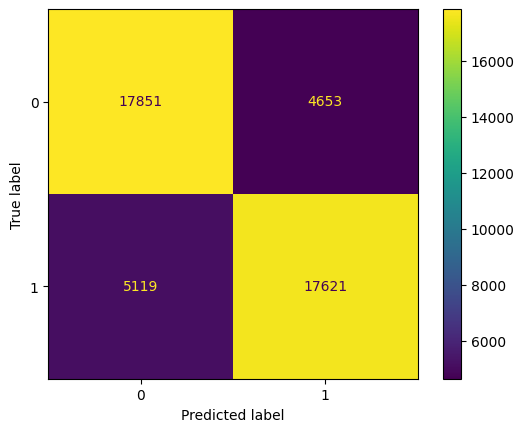

In [ ]:
disp_1.plot()

In [ ]:
print('정확도:', accuracy_score(test_target_1st, target_tfidf_1st_predict))
print('정밀도:', precision_score(test_target_1st, target_tfidf_1st_predict))
print('재현율:', recall_score(test_target_1st, target_tfidf_1st_predict))
print('F1-score:', f1_score(test_target_1st, target_tfidf_1st_predict))
print('ROC-AUC:', roc_auc_score(test_target_1st, target_tfidf_1st_predict))

# 정확도: 0.784
# 정밀도: 0.791
# 재현율: 0.775
# F1-score: 0.783
# ROC-AUC: 0.784

정확도: 0.784015560074264
정밀도: 0.7911017329621981
재현율: 0.7748900615655233
F1-score: 0.7829119829386414
ROC-AUC: 0.7840634097376141


### 2nd

In [ ]:
cm_2 = confusion_matrix(test_target_2nd,
                        target_tfidf_2nd_predict,
                        labels=linear_svc_tfidf_2nd.classes_)

disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2,
                                display_labels=linear_svc_tfidf_2nd.classes_)

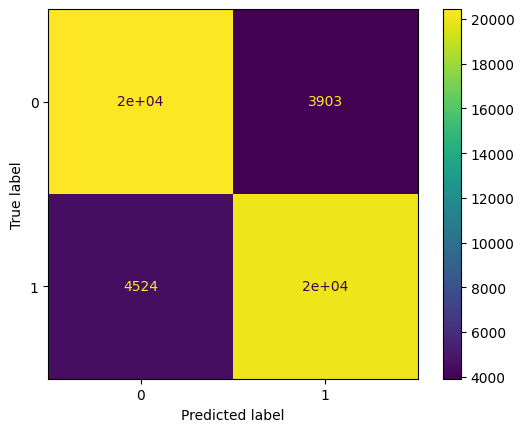

In [ ]:
disp_2.plot()

In [ ]:
print('정확도:', accuracy_score(test_target_2nd, target_tfidf_2nd_predict))
print('정밀도:', precision_score(test_target_2nd, target_tfidf_2nd_predict))
print('재현율:', recall_score(test_target_2nd, target_tfidf_2nd_predict))
print('F1-score:', f1_score(test_target_2nd, target_tfidf_2nd_predict))
print('ROC-AUC:', roc_auc_score(test_target_2nd, target_tfidf_2nd_predict))

# 정확도: 0.828
# 정밀도: 0.837
# 재현율: 0.816
# F1-score: 0.826
# ROC-AUC: 0.828

정확도: 0.8276264113892979
정밀도: 0.8368174596538173
재현율: 0.8156404091446269
F1-score: 0.8260932373031761
ROC-AUC: 0.8276731759469078


## 2. Tuning

SVM: 분류와 회귀에 모두 적용할 수 있는 지도 학습 알고리즘
- 훈련 데이터셋에서 두 클래스 간의 최대 margin을 찾는 것을 목표로 하며, 이 최대 margin을 가지는 결정 경계를 찾는 방식으로 동작한다.
- 선형과 비선형으로 구분되는데, 여기서는 비선형으로 하면 시간이 너무 오래 걸리므로 선형 SVM을 이용하였다.

장점
- 분류 성능과 일반화 성능이 높음
- 이상치에 대해 강건성(robustness)을 보인다.

단점
- 대용량 데이터셋의 처리가 어렵다
    - 계산량이 많아서 컴퓨팅 자원과 시간이 많이 소모된다.
- 모델 해석이 어려울 수 있다.


In [ ]:
from sklearn.model_selection import GridSearchCV

LinearSVC는 선형 커널 SVM 분류 모델이다.

loss (default='squared_hinge')
- loss function 적용 방식을 설정한다.
- 'hinge'는 standard한 SVM loss이며, 'squared_hinge'는 hinge loss를 제곱한 것이다.
- 'squared_hinge'를 적용하면 큰 loss에 대해서 더 강한 penalty를 주게 된다.

C (default=1.0)
- 규제 강도의 역수이다.
- C가 작으면 모형이 단순해져 결정 경계가 부드러워지며 (오차를 어느 정도 허용하므로 소프트 마진), C가 크면 더 많은 학습 데이터를 정확히 분류하도록 동작한다. (오차를 최대한 허용하지 않으려 하므로 하드 마진에 가까워진다.)
- C가 너무 적으면 너무 많은 오차를 허용하게 되므로 과소적합을 유발할 수 있으며, C가 너무 크면 과대적합을 유발할 수 있다.

여기서 C는 default를 기준으로 작은 범위, 큰 범위를 모두 고려해서 튜닝을 실시하였고, loss는 두 가지를 모두 고려하였다.

In [ ]:
svc_1st = LinearSVC(random_state=42)
svc_2nd = LinearSVC(random_state=42)

param_grid = {
    'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'loss': ['hinge', 'squared_hinge'],
}

grid_search_1st = GridSearchCV(svc_1st,
                               param_grid,
                               cv=5,
                               scoring='f1',
                               verbose=3)

grid_search_2nd = GridSearchCV(svc_2nd,
                               param_grid,
                               cv=5,
                               scoring='f1',
                               verbose=3)

# 물론 target 레이블 분포가 균형에 가깝지만
# 정밀도, 재현율을 모두 고려하기 위해 scoring을 f1으로 설정

### 1st

In [ ]:
grid_search_1st.fit(train_tfidf_1st, train_target_1st)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ................C=0.01, loss=hinge;, score=0.686 total time=   0.1s
[CV 2/5] END ................C=0.01, loss=hinge;, score=0.685 total time=   0.2s
[CV 3/5] END ................C=0.01, loss=hinge;, score=0.681 total time=   0.2s
[CV 4/5] END ................C=0.01, loss=hinge;, score=0.678 total time=   0.2s
[CV 5/5] END ................C=0.01, loss=hinge;, score=0.691 total time=   0.2s
[CV 1/5] END ........C=0.01, loss=squared_hinge;, score=0.770 total time=   0.3s
[CV 2/5] END ........C=0.01, loss=squared_hinge;, score=0.769 total time=   0.3s
[CV 3/5] END ........C=0.01, loss=squared_hinge;, score=0.763 total time=   0.3s
[CV 4/5] END ........C=0.01, loss=squared_hinge;, score=0.762 total time=   0.3s
[CV 5/5] END ........C=0.01, loss=squared_hinge;, score=0.769 total time=   0.3s
[CV 1/5] END ................C=0.05, loss=hinge;, score=0.755 total time=   0.2s
[CV 2/5] END ................C=0.05, loss=hinge;

GridSearchCV(cv=5, estimator=LinearSVC(random_state=42),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                         'loss': ['hinge', 'squared_hinge']},
             scoring='f1', verbose=3)

In [ ]:
grid_search_1st.best_params_, grid_search_1st.best_score_

({'C': 0.1, 'loss': 'squared_hinge'}, 0.7823090671929631)

In [ ]:
target_predict_1st = grid_search_1st.predict(test_tfidf_1st)

In [ ]:
cm_1st = confusion_matrix(test_target_1st,
                          target_predict_1st,
                          labels=grid_search_1st.classes_)

disp_1st = ConfusionMatrixDisplay(confusion_matrix=cm_1st,
                                  display_labels=grid_search_1st.classes_)

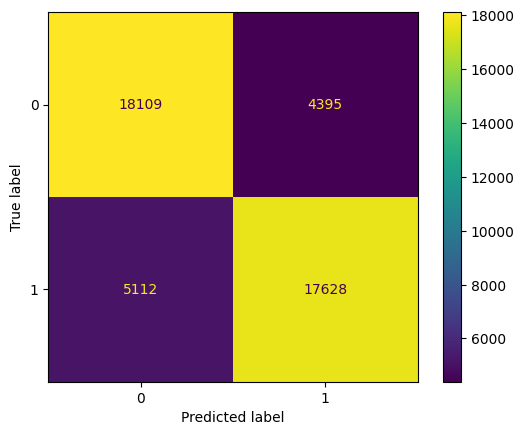

In [ ]:
disp_1st.plot()

In [ ]:
accuracy_1st = accuracy_score(test_target_1st, target_predict_1st)
precision_1st = precision_score(test_target_1st, target_predict_1st)
recall_1st = recall_score(test_target_1st, target_predict_1st)
f1_1st = f1_score(test_target_1st, target_predict_1st)
roc_auc_1st = roc_auc_score(test_target_1st, target_predict_1st)

print('정확도:', accuracy_1st)
print('정밀도:', precision_1st)
print('재현율:', recall_1st)
print('F1-score:', f1_1st)
print('ROC-AUC:', roc_auc_1st)

# 정확도: 0.784 -> 0.790
# 정밀도: 0.791 -> 0.800
# 재현율: 0.775 -> 0.775
# F1-score: 0.783 -> 0.788
# ROC-AUC: 0.784 -> 0.790

정확도: 0.7898726903014764
정밀도: 0.8004359079144531
재현율: 0.775197889182058
F1-score: 0.7876147711279404
ROC-AUC: 0.789949637801125


### 2nd

In [ ]:
grid_search_2nd.fit(train_tfidf_2nd, train_target_2nd)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ................C=0.01, loss=hinge;, score=0.768 total time=   0.3s
[CV 2/5] END ................C=0.01, loss=hinge;, score=0.768 total time=   0.2s
[CV 3/5] END ................C=0.01, loss=hinge;, score=0.763 total time=   0.3s
[CV 4/5] END ................C=0.01, loss=hinge;, score=0.763 total time=   0.3s
[CV 5/5] END ................C=0.01, loss=hinge;, score=0.772 total time=   0.3s
[CV 1/5] END ........C=0.01, loss=squared_hinge;, score=0.810 total time=   0.6s
[CV 2/5] END ........C=0.01, loss=squared_hinge;, score=0.811 total time=   0.6s
[CV 3/5] END ........C=0.01, loss=squared_hinge;, score=0.805 total time=   0.6s
[CV 4/5] END ........C=0.01, loss=squared_hinge;, score=0.807 total time=   0.6s
[CV 5/5] END ........C=0.01, loss=squared_hinge;, score=0.810 total time=   0.6s
[CV 1/5] END ................C=0.05, loss=hinge;, score=0.810 total time=   0.3s
[CV 2/5] END ................C=0.05, loss=hinge;

GridSearchCV(cv=5, estimator=LinearSVC(random_state=42),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                         'loss': ['hinge', 'squared_hinge']},
             scoring='f1', verbose=3)

In [ ]:
grid_search_2nd.best_params_, grid_search_2nd.best_score_

({'C': 0.1, 'loss': 'squared_hinge'}, 0.8252353291144908)

In [ ]:
target_predict_2nd = grid_search_2nd.predict(test_tfidf_2nd)

In [ ]:
cm_2nd = confusion_matrix(test_target_2nd,
                          target_predict_2nd,
                          labels=grid_search_2nd.classes_)

disp_2nd = ConfusionMatrixDisplay(confusion_matrix=cm_2nd,
                                display_labels=grid_search_2nd.classes_)

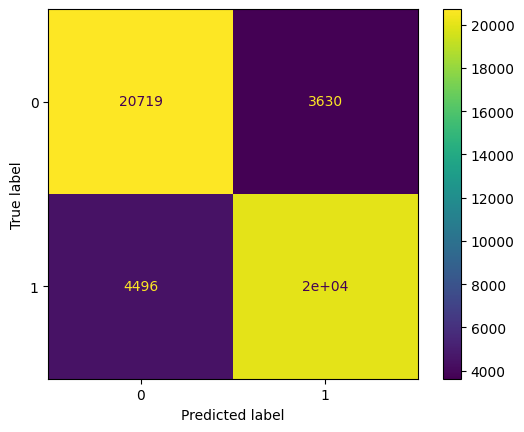

In [ ]:
disp_2nd.plot()

In [ ]:
accuracy_2nd = accuracy_score(test_target_2nd, target_predict_2nd)
precision_2nd = precision_score(test_target_2nd, target_predict_2nd)
recall_2nd = recall_score(test_target_2nd, target_predict_2nd)
f1_2nd = f1_score(test_target_2nd, target_predict_2nd)
roc_auc_2nd = roc_auc_score(test_target_2nd, target_predict_2nd)

print('정확도:', accuracy_2nd)
print('정밀도:', precision_2nd)
print('재현율:', recall_2nd)
print('F1-score:', f1_2nd)
print('ROC-AUC:', roc_auc_2nd)

# 정확도: 0.828 -> 0.834
# 정밀도: 0.837 -> 0.847
# 재현율: 0.816 -> 0.817
# F1-score: 0.826 -> 0.831
# ROC-AUC: 0.828 -> 0.834

정확도: 0.8337833415153003
정밀도: 0.8466607527563047
재현율: 0.8167814499368352
F1-score: 0.8314527503526093
ROC-AUC: 0.8338496760547044


## 3. Result

In [ ]:
data = {
    'Accuracy': [round(accuracy_1st, 3), round(accuracy_2nd, 3)],
    'F1-score': [round(f1_1st, 3), round(f1_2nd, 3)],
    'Precision': [round(precision_1st, 3), round(precision_2nd, 3)],
    'Recall': [round(recall_1st, 3), round(recall_2nd, 3)],
    'ROC-AUC': [round(roc_auc_1st, 3), round(roc_auc_2nd, 3)]
}

df = pd.DataFrame(data, index=['1st', '2nd'])

In [ ]:
df

,Accuracy,F1-score,Precision,Recall,ROC-AUC
1st,0.790,0.788,0.800,0.775,0.790
2nd,0.834,0.831,0.847,0.817,0.834
